In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.manifold import TSNE
import pickle
# from Bio.Cluster import kcluster
import os
import numpy as np
import yaml
import os
import pandas
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
import seaborn as sns
# import pyclustering
import matplotlib.pylab as plt
import seaborn as sb
from os.path import join
plt.rcParams['figure.dpi'] = 400

from shutil import copyfile
import matplotlib as plt
# ------- SERVER EXTENSIONS ---------
lib =  r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities/droplet_dataset'
lib2 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/utilities'
lib3 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/data_analysis'
lib4 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy'
lib5 = r'/srv01/technion/shitay/Code/classifying_response_to_immunotherapy/scripts'
import sys
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
# ------- SERVER EXTENSIONS ---------

Kmeans immune cells

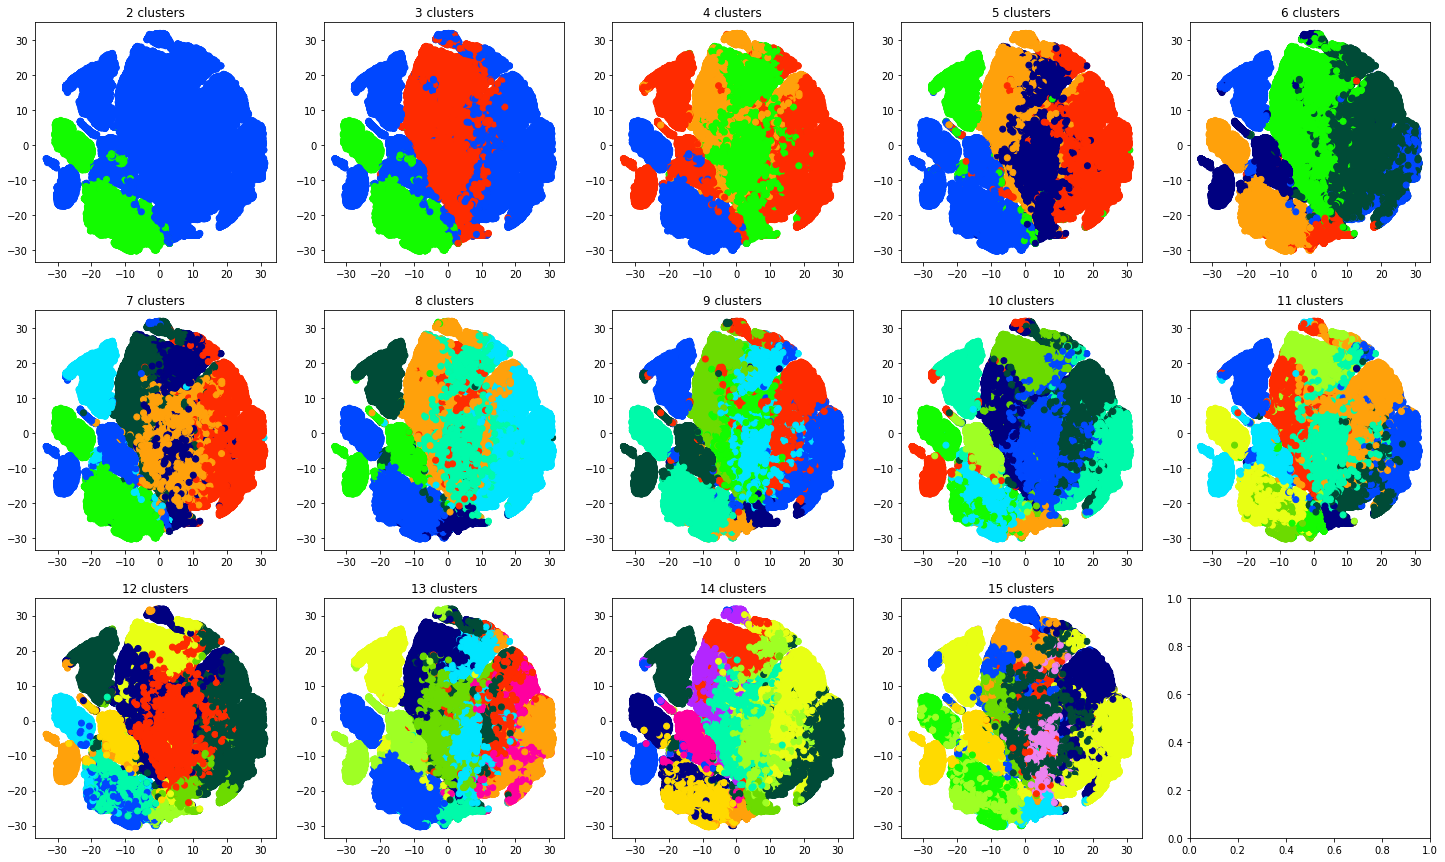

In [16]:
KMEANS_PATH = fr'/storage/md_keren/shitay/outputs/clustering/kmeans/row_kmeans'
TSNE_PATH = fr'/storage/md_keren/shitay/outputs/TSNE/immune_cells_bhtsne_21.4.21.pkl'



cells_embedded = pickle.load(open(TSNE_PATH, 'rb'))


fig, axs = plt.pyplot.subplots(3, 5)
fig.set_size_inches(25, 15)

# colors = plt.pyplot.cm.rainbow(np.linspace(0, 1, 60))[::4]
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colors = np.array([colormap(i) for i in np.linspace(0, 0.9,15)])[[2, 5, 11, 10, 0, 1, 3, 4, 6, 7, 8, 9, 12, 13, 14]]

i = 0
j = 0
for k in range(2, 16):
    path = join(KMEANS_PATH, f'kmeans_immune_cells_var0.315_k_{k}.pkl')
    kmeans = pickle.load(open(path, 'rb'))
    num_of_cells = sum([len(cl) for cl in kmeans['clusters']])
    # Set colors with clusters
    cluster_colors = np.zeros((num_of_cells, 4))
    for cluster_idx, cluster_list in enumerate(kmeans['clusters']):
        cluster_colors[cluster_list] = colors[cluster_idx]
#         cluster_colors[cluster_list] = cluster_idx

    axs[i][j].scatter(cells_embedded[:,0], cells_embedded[:,1], c=cluster_colors)
    axs[i][j].set_title(f"{k} clusters")

    if j==4:
        j=0
        i += 1
    else:
        j+=1
#     plt.pyplot.title(f"{k} clusters", size=24)


TSNE of tumor

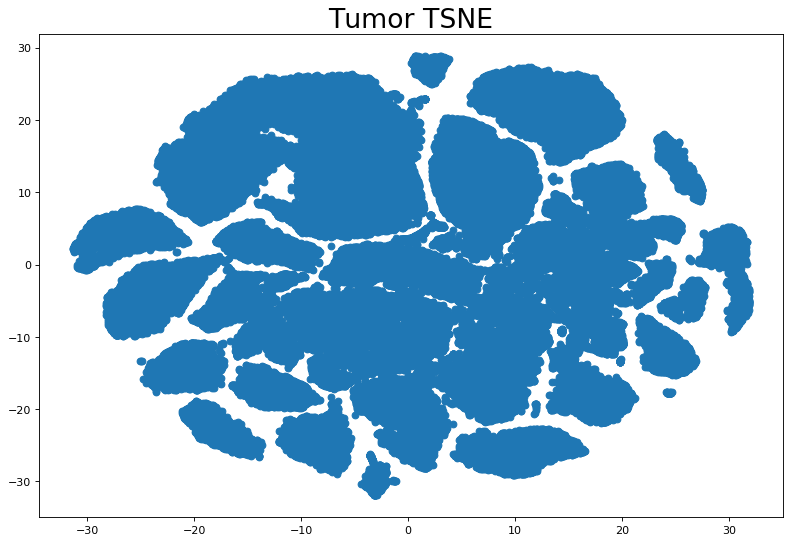

In [38]:
TSNE_PATH = fr'/storage/md_keren/shitay/outputs/TSNE/tumor_cells_bhtsne_21.4.21.pkl'
cells_embedded = pickle.load(open(TSNE_PATH, 'rb'))
# fig, ax = plt.pyplot.subplots(figsize=(14,8))
plt.pyplot.figure(figsize=(12, 8), dpi=80)
plt.pyplot.scatter(cells_embedded[:,0], cells_embedded[:,1]);
plt.pyplot.title(f"Tumor TSNE", size=24);

TSNE of all cells (tumor & immune & stroma)

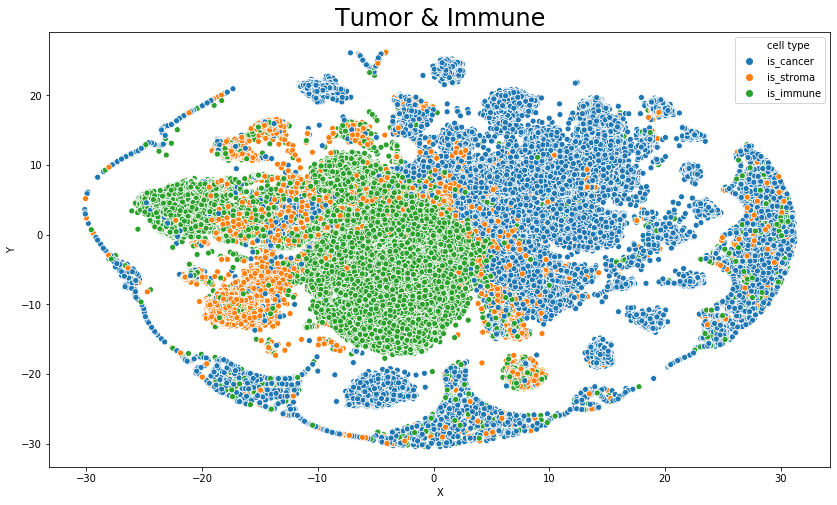

In [30]:
TSNE_PATH = fr'/storage/md_keren/shitay/outputs/TSNE/all_cells_variance_0.315.pkl'
cells_embedded = pickle.load(open(TSNE_PATH, 'rb'))


filtered_cells_path = fr'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/cohort_var0.312.pkl'
filtered_cells = pickle.load(open(filtered_cells_path, 'rb'))


df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df["cell type"] = filtered_cells.get_cancer_immune_stroma_map()[1]
fig, ax = plt.pyplot.subplots(figsize=(14,8))
lm = sns.scatterplot(ax=ax, x="X", y="Y",
              hue="cell type",
              data=df,)
plt.pyplot.title(f"Tumor & Immune", size=24);

In [45]:
tumor_path = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/tumor_cells_var0.272.pkl'

tumor_cohort = pickle.load(open(tumor_path, 'rb'))



In [46]:
tsne_results = pd.DataFrame(cells_embedded, index=tumor_cohort.barcodes, columns=['TSNE1', 'TSNE2']) 

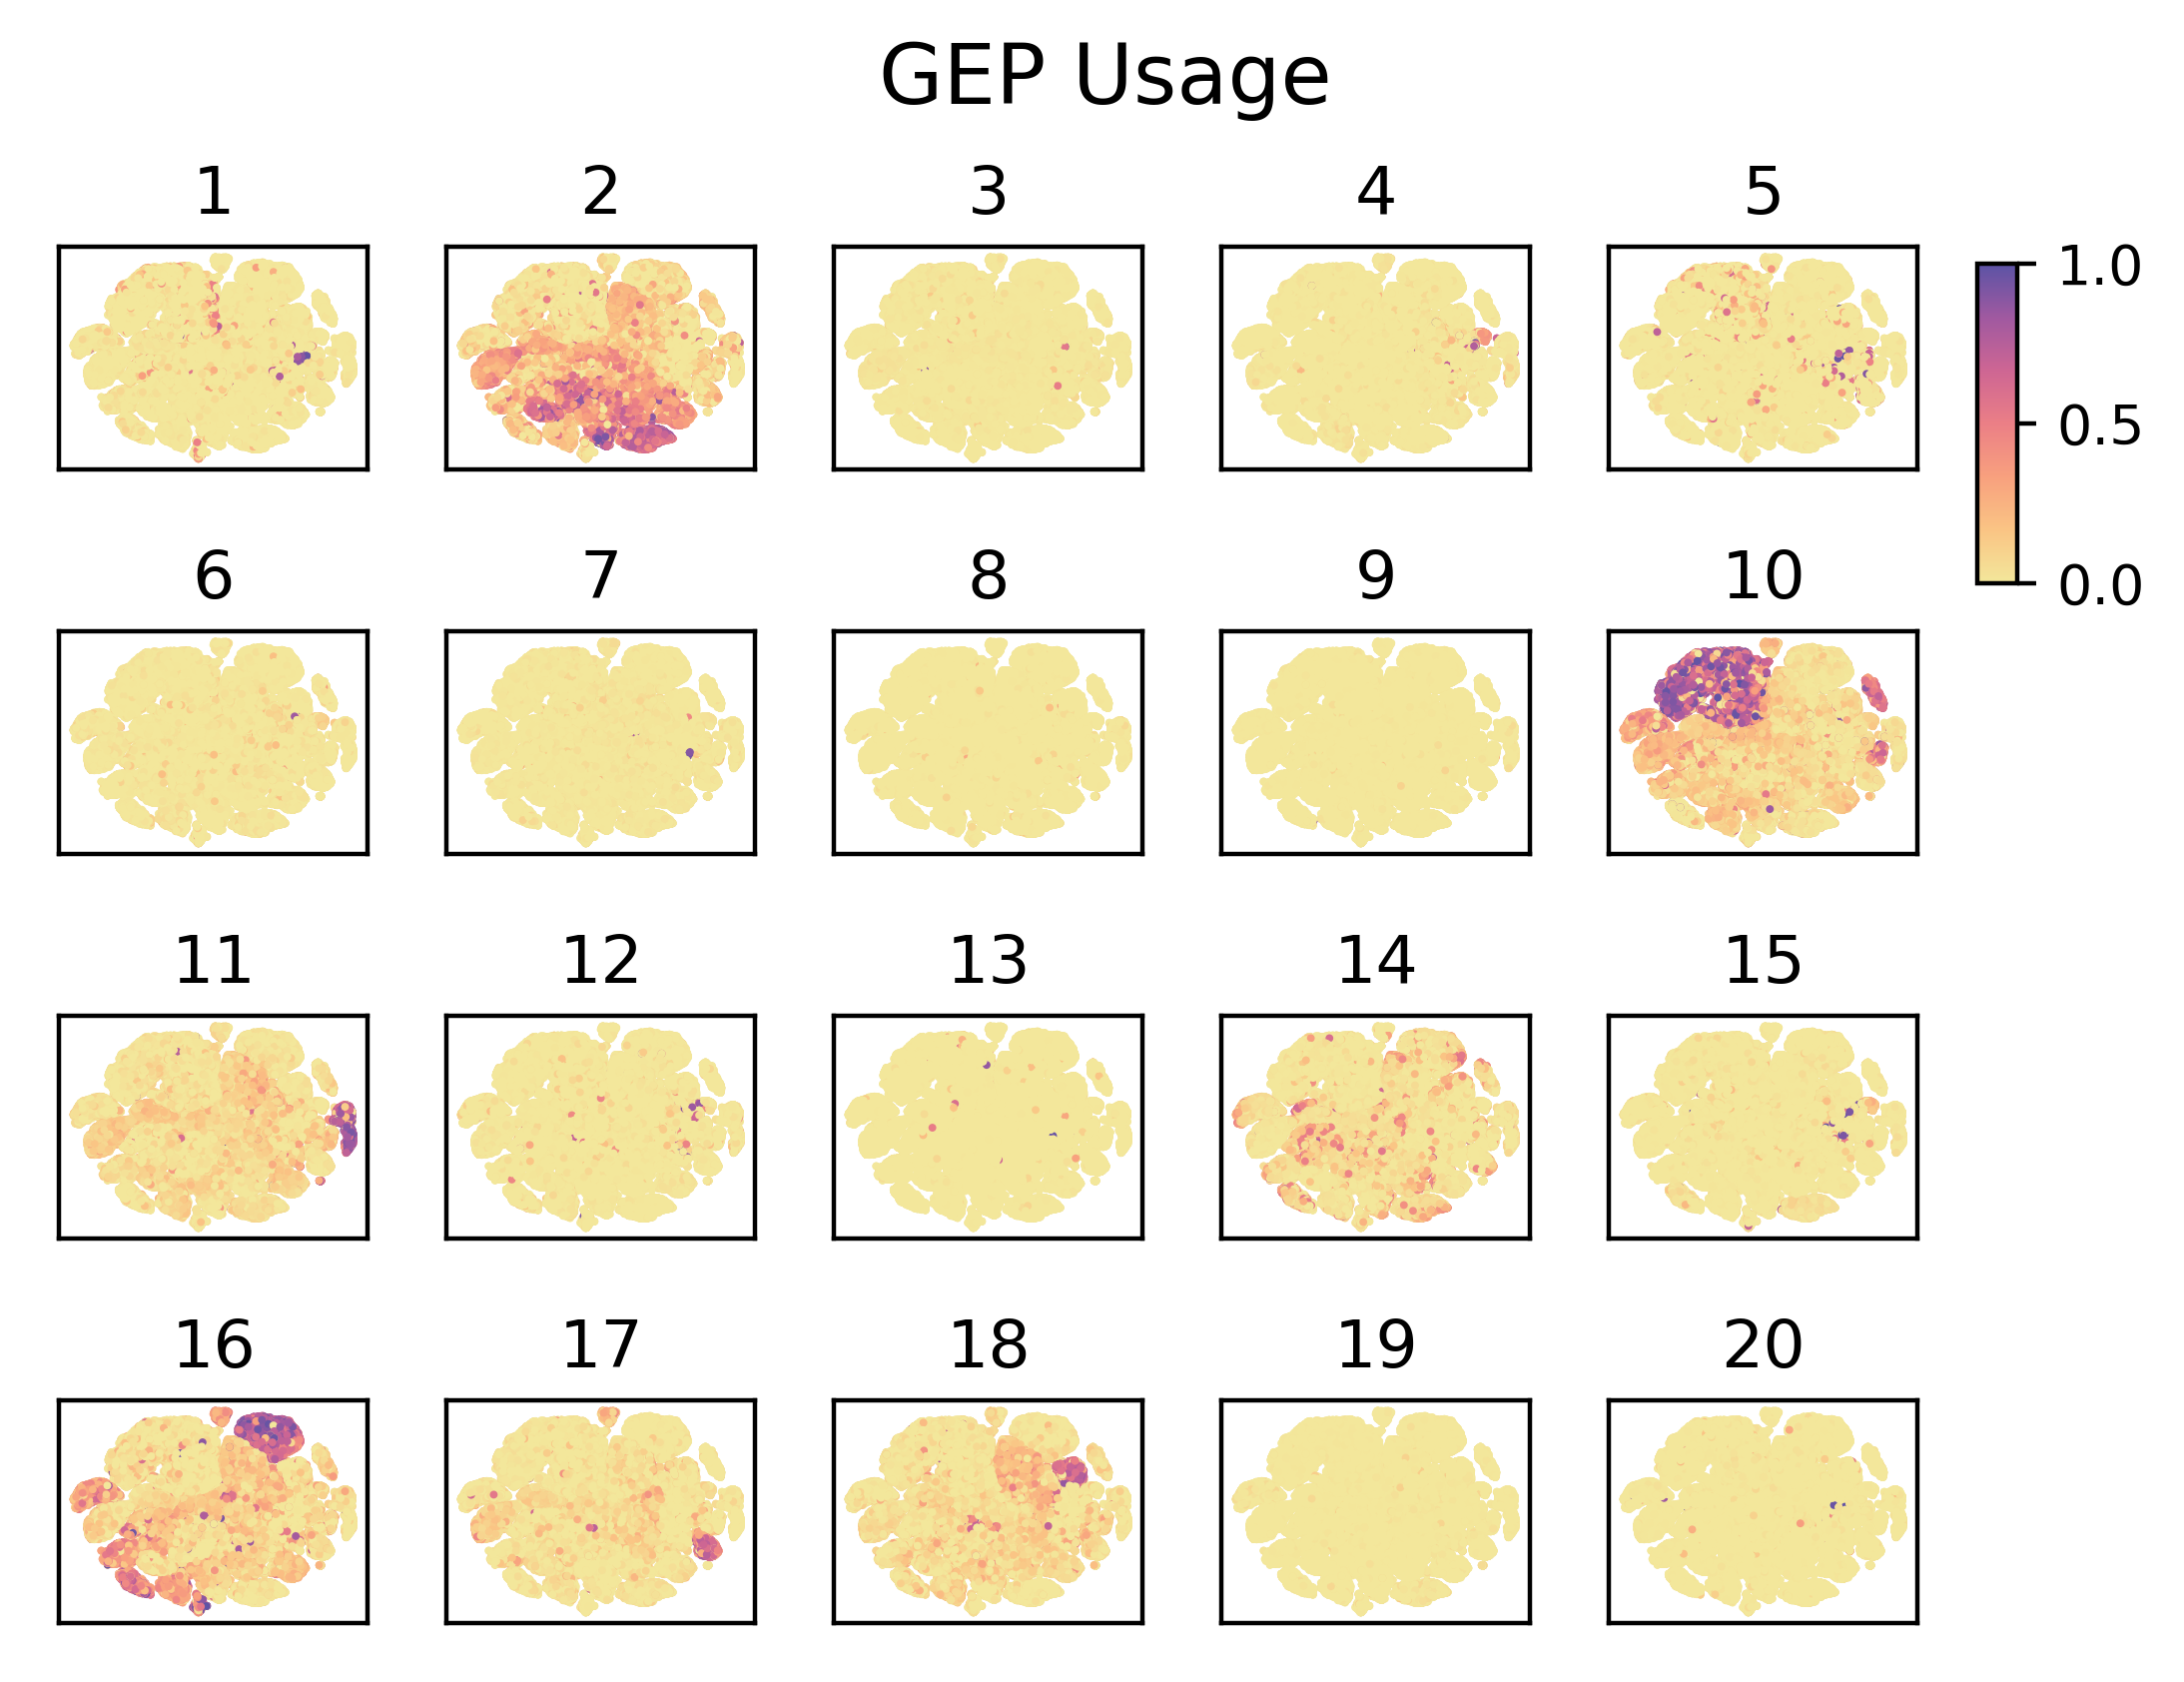

In [49]:
# import palettable
# cmap = palettable.cartocolors.sequential.Sunset_7.get_mpl_colormap()



usage_matrix = pd.read_csv(fr'/storage/md_keren/shitay/outputs/cNMF/executions/tumor_run/v1_21.4.21/v1_21.4.21.usages.k_20.dt_0_10.consensus.txt', sep='\t', index_col=0)
usage_matrix.columns = np.arange(1,selected_K+1)
normalized_usage_matrix = usage_matrix.div(usage_matrix.sum(axis=1), axis=0)
normalized_usage_matrix.head()

selected_K = 20
cmap = pickle.load(open(r'/storage/md_keren/shitay/garbage/cmap.pkl', 'rb'))
tsne_and_usages = pd.merge(left=normalized_usage_matrix, right=tsne_results, left_index=True, right_index=True)





(fig,axes) = plt.pyplot.subplots(4, 5, figsize=(5,4), dpi=400)
axes = axes.ravel()
for i in range(1, selected_K+1):
    sc = axes[i-1].scatter(tsne_and_usages['TSNE1'], tsne_and_usages['TSNE2'], c=tsne_and_usages[i],
                      cmap=cmap, vmin=0, vmax=1.,
                      s=2, edgecolor='none', rasterized=True)
    axes[i-1].set_title(i)
    axes[i-1].set_xticks([])
    axes[i-1].set_yticks([])
    
    
    

plt.pyplot.tight_layout()
cbarax = fig.add_axes([1,.7,.02, .2])
plt.pyplot.colorbar(sc, cax=cbarax)
_ = plt.pyplot.figtext(.45,1,'GEP Usage', fontsize=15)
# axes[-1].remove()
# axes[-2].remove()

In [53]:
fig.savefig('/storage/md_keren/shitay/garbage/foo.png')

In [2]:
# import palettable
# cmap = palettable.cartocolors.sequential.Sunset_7.get_mpl_colormap()



usage_matrix = pd.read_csv(fr'/storage/md_keren/shitay/outputs/cNMF/executions/tumor_runs/K21_2000genes_100iter/K21_2000genes_100iter.usages.k_21.dt_0_10.consensus.txt', sep='\t', index_col=0)
usage_matrix.columns = np.arange(1,selected_K+1)
normalized_usage_matrix = usage_matrix.div(usage_matrix.sum(axis=1), axis=0)
normalized_usage_matrix.head()

selected_K = 21
cmap = pickle.load(open(r'/storage/md_keren/shitay/garbage/cmap.pkl', 'rb'))
tsne_and_usages = pd.merge(left=normalized_usage_matrix, right=tsne_results, left_index=True, right_index=True)





(fig,axes) = plt.pyplot.subplots(5, 5, figsize=(5,4), dpi=400)
axes = axes.ravel()
for i in range(1, selected_K+1):
    sc = axes[i-1].scatter(tsne_and_usages['TSNE1'], tsne_and_usages['TSNE2'], c=tsne_and_usages[i],
                      cmap=cmap, vmin=0, vmax=1.,
                      s=2, edgecolor='none', rasterized=True)
    axes[i-1].set_title(i)
    axes[i-1].set_xticks([])
    axes[i-1].set_yticks([])
    
    
    

plt.pyplot.tight_layout()
cbarax = fig.add_axes([1,.7,.02, .2])
plt.pyplot.colorbar(sc, cax=cbarax)
_ = plt.pyplot.figtext(.45,1,'GEP Usage', fontsize=15)
axes[-1].remove()
axes[-2].remove()

FileNotFoundError: [Errno 2] No such file or directory: '/storage/md_keren/shitay/outputs/cNMF/executions/tumor_runs/K21_2000genes_100iter/K21_2000genes_100iter.usages.k_21.dt_0_10.consensus.txt'